## Welcome to Geographic Data Science!
### Geographic Information Systems, GIS, Geospatial analysis
- This morning's goal: introduce concepts, import libraries
- This afternoon's goal: work with spatial datasets, mini-spatial project

In [ ]:
# version 2025.07.07
# updated July 8 2025
import pandas as pd
import os

- pandas data frames contain rows of observations or features, and columns of attributes that describe those features
- **geopandas** data frames contain rows of observations or features, with columns of attributes, and one specialized column that stores the geographic attributes of the feature
- this **geometry** column can contain:
    - coordinate points
    - coordinates that form a line or 'polyline' feature
    - coordinates that form a shape (polygon)

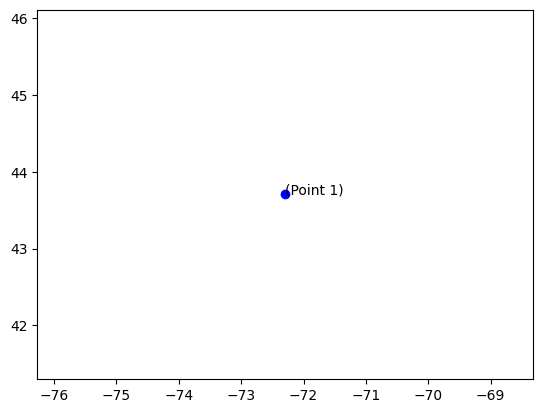

In [ ]:
# plot a basic coordinate pair

import matplotlib.pyplot as plt

# define the coordinate pair
coordinates = (43.704, -72.29127)

# Plot the coordinate using matplotlib
plt.scatter(coordinates[1], coordinates[0], color='blue')  # Longitude first, then Latitude
plt.text(coordinates[1], coordinates[0], '(Point 1)')
plt.show()

Exercise:
Visit the "Folium" website [https://pypi.org/project/folium/](https://pypi.org/project/folium/) and answer the question: What is this Python library designed to do? ___ ___ ___ ___


In [ ]:
# import the folium library here:
import _____________

**Exercise**:

enter the coordinate values from above to define the variable 'coordinate', and then:

Plot using Folium, a Python library with tools to plot coordinates on existing base maps, such as [Open Street Map](https://www.openstreetmap.org/#map=5/39.572/-75.125) ( https://www.openstreetmap.org/#map=5/39.572/-75.125 )

In [ ]:
# pip install folium

In [ ]:
# Import folium for simple mapping and base map data
import folium

# Define the coordinate (latitude, longitude)
coordinates =  ______________

# Plot the coordinate using folium
# Create a map centered around the coordinate
m = folium.Map(location=coordinates, zoom_start=16)

# Add a marker to the map
folium.Marker(coordinates, popup='Point 1').add_to(m)

m

**Exercise**:

Plot a point with a 'popup' box at the equator

Answer the following:  when you click the marker point, what happens/what is displayed? ___ ___ ____ ____

In [ ]:
# 'json' is an open data format that is very useful in data science
# import the 'json library here:


import _________



In [ ]:
# 'geojson' is a special format of json, built for use in geospatial data science, https://pypi.org/project/geojson/

# import the 'geojson library here:

#pip install geojson

import _________

In [ ]:
import folium
import json
# define location in GeoJSON format(using geojson.io) and extract coordinates data

# copy in spatial data, from a single point created with
# https://geojson.io/

geojson_data =  ________

coordinates = geojson_data['features'][0]['geometry']['coordinates']
latitude = coordinates[1]
longitude = coordinates[0]
# visualize: create a map centered around the point, Add the point to the map and display
m = folium.Map(location=[____, _____], zoom_start=15)
folium.Marker([_____, ______]).add_to(m)
m
# it is also possible to save the map to an html file, rather than display it in the Jupyter notebook:
# m.save("map.html")

In [ ]:
import pandas as pd
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
#load data into a DataFrame object:
df = pd.DataFrame(data)
print(df)


   calories  duration
0       420        50
1       380        40
2       390        45


In [ ]:
#pip install geopandas

## Exercise:
extract and load a geospatial dataset using the 'GeoPandas' library

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# List of cities with their coordinates
cities = {
    'City': ['Boston', 'New York', 'Washington D.C.'],
    'Latitude': [42.3601, 40.7128, 38.9072],
    'Longitude': [-71.0589, -74.0060, -77.0369]
}

# Creating a GeoDataFrame
geometry = [Point(xy) for xy in zip(cities['Longitude'], cities['Latitude'])]
geo_df = gpd.GeoDataFrame(cities, geometry=geometry)

print(geo_df)


              City  Latitude  Longitude                  geometry
0           Boston   42.3601   -71.0589  POINT (-71.0589 42.3601)
1         New York   40.7128   -74.0060   POINT (-74.006 40.7128)
2  Washington D.C.   38.9072   -77.0369  POINT (-77.0369 38.9072)


In [ ]:
# Initialize a map centered on the northeastern US
m = folium.Map(location=[41, -74], zoom_start=6)

# Add points to the map
for idx, row in geo_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(m)

# Display the map
m

In [ ]:
path = os.getcwd()
print(path)

/content


In [ ]:
# for jhub 2025-07-07:

# %%
path = os.getcwd()

# %%
print(path)

# %%
animal_sightings_df = pd.read_csv('/home/jovyan/shared/DSS/day7-am/data/animal-sightings.csv')
animal_sightings_df.head(3)


In [ ]:
import matplotlib.pyplot as plt

# %%

plt.scatter(animal_sightings_df['longitude'], animal_sightings_df['latitude'], alpha=0.5, edgecolors='w', s=100)
# Show the plot
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import folium

# use geojson.io to get the remaining state capitals for Maine, NH, VT,

# Define a dictionary with state capitals
state_capitals = {
    __________________,
    'New Hampshire': {'city': 'Concord', 'lat': 43.2109, 'lon': -71.5323},
    ____________________,
    'Massachusetts': {'city': 'Boston', 'lat': 42.3584, 'lon': -71.0596},
    ____________________,
    'Connecticut': {'city': 'Hartford', 'lat': 41.7654, 'lon': -72.6770}
}

# Create a list to store the GeoDataFrame rows
data = []

# Iterate over the state capitals dictionary
for state, info in state_capitals.items():
    # Create a Point object using the latitude and longitude
    point = Point(info['lon'], info['lat'])

    # Append a dictionary with the state, city, and point to the data list
    data.append({
        'State': state,
        'City': info['city'],
        'geometry': point
    })

# Convert the data list to a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry', crs='EPSG:4326')

# Print the GeoDataFrame
print(gdf)

# Create a Folium map with the state capitals
map = folium.Map(location=[44.0042, -71.3333], zoom_start=7)

# Iterate over the GeoDataFrame rows and add markers to the map
# use the correct fields for the popup
for index, row in gdf.iterrows():
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=f"{row[_________]}: {row[_____]}"
    ).add_to(map)

# Save the map as an HTML file
#map.save('new_england_state_capitals.html')
#show the map
map

In [ ]:
# geocode a street address
from geopy.geocoders import Nominatim

# Instantiate the Nominatim geolocator
geolocator = Nominatim(user_agent="my_geocoder_app") # Replace with a unique user agent

# Geocode an address
address = "1600 Amphitheatre Parkway, Mountain View, CA"
location = geolocator.geocode(address)

if location:
    print(f"Address: {location.address}")
    print(f"Latitude: {location.latitude}")
    print(f"Longitude: {location.longitude}")
else:
    print("Address not found.")

map = folium.Map(location=[location.latitude, location.longitude], zoom_start=15)
folium.Marker([location.latitude, location.longitude], popup=address).add_to(map)
map